## import some libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

## Explore the dataset

In [2]:
file_path ='WineQuality.csv'
df = pd.read_csv(file_path)

In [3]:
df.tail(3)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
32482,1126,6.3,0.20,0.24,1.7,0.052,36.0,135.0,0.99374,3.80,0.66,10.8,6,White Wine
32483,2924,6.2,0.20,0.33,5.4,0.028,21.0,75.0,0.99012,3.36,0.41,13.5,7,White Wine
32484,5462,8.1,0.28,0.46,15.4,0.059,32.0,177.0,1.00040,3.27,0.58,9.0,4,White Wine


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32485 entries, 0 to 32484
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            32485 non-null  int64  
 1   fixed acidity         32485 non-null  float64
 2   volatile acidity      32485 non-null  float64
 3   citric acid           32485 non-null  float64
 4   residual sugar        32485 non-null  float64
 5   chlorides             32485 non-null  float64
 6   free sulfur dioxide   32485 non-null  float64
 7   total sulfur dioxide  32485 non-null  float64
 8   density               32485 non-null  float64
 9   pH                    32485 non-null  float64
 10  sulphates             32485 non-null  float64
 11  alcohol               32485 non-null  float64
 12  quality               32485 non-null  int64  
 13  Type                  32485 non-null  object 
dtypes: float64(11), int64(2), object(1)
memory usage: 3.5+ MB


## Checkout for null values/duplicates

In [5]:
df.isnull().sum()

Unnamed: 0              0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Type                    0
dtype: int64

In [6]:
df.duplicated().sum()

26036

## Remove the duplicates

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

## Data Visualization

In [9]:
df.head(3)

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Type
0,2732,7.4,0.170,0.29,1.4,0.047,23.0,107.0,0.99390,3.52,0.65,10.4,6,White Wine
1,2607,5.3,0.310,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7,6,White Wine
2,1653,4.7,0.145,0.29,1.0,0.042,35.0,90.0,0.99080,3.76,0.49,11.3,6,White Wine


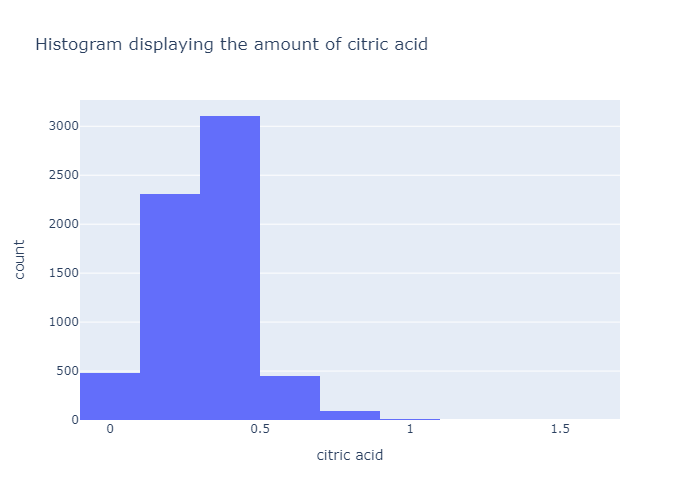

In [10]:
fig = px.histogram(df, x='citric acid', nbins=15, title='Histogram displaying the amount of citric acid')
fig.show(renderer='png')

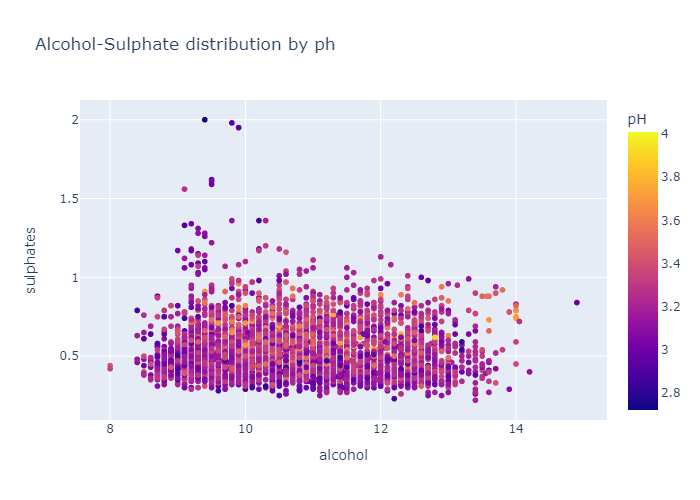

In [11]:
fig = px.scatter(df, x='alcohol', y='sulphates', color='pH', title='Alcohol-Sulphate distribution by ph')
fig.show(renderer='png')

In [12]:
df2 = df['alcohol'].value_counts().reset_index()

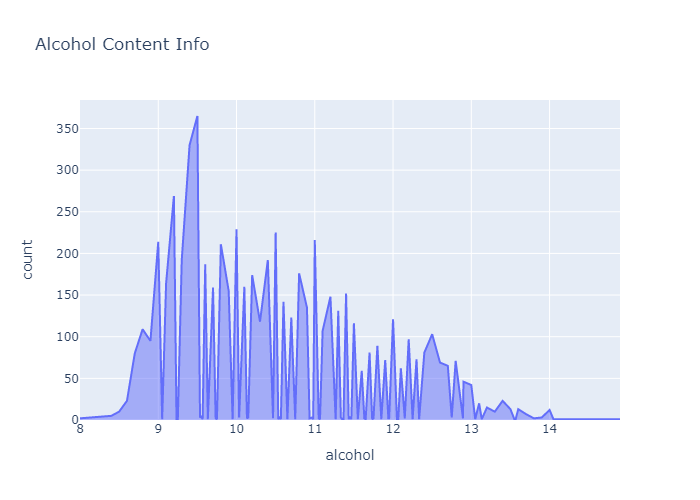

In [13]:
fig = px.area(df2, x='alcohol', y='count', title='Alcohol Content Info')
fig.show(renderer='png')

## select the numeric data_types

In [14]:
numeric = df.select_dtypes('number')
z = numeric.corr()

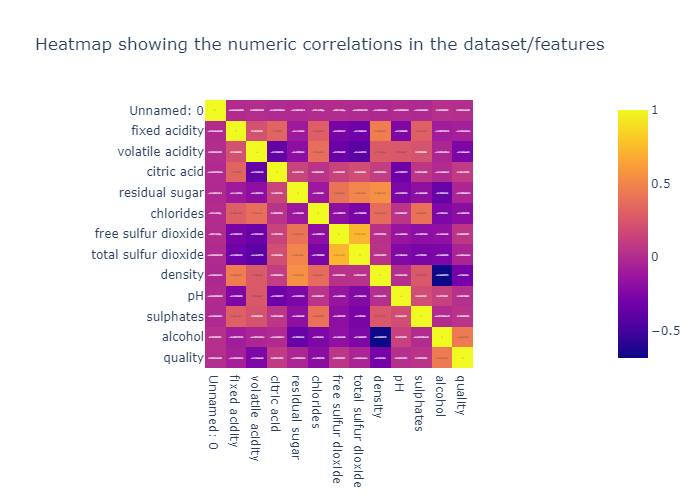

In [15]:
fig = px.imshow(z, text_auto=True, title='Heatmap showing the numeric correlations in the dataset/features')
fig.show(renderer='png')

In [16]:
df['quality'].value_counts()

quality
6    2818
5    2122
7    1069
4     215
8     190
3      30
9       5
Name: count, dtype: int64

In [17]:
df['quality'] = df['quality'].map({
    3:'Bad-wine', 4:'low-quality', 5:'Refined',6:'Good',7:'very-good',8:'standard',9:'Excellent'
})

In [18]:
df2 = df['quality'].value_counts().reset_index()
df2

,quality,count
0,Good,2818
1,Refined,2122
2,very-good,1069
3,low-quality,215
4,standard,190
5,Bad-wine,30
6,Excellent,5


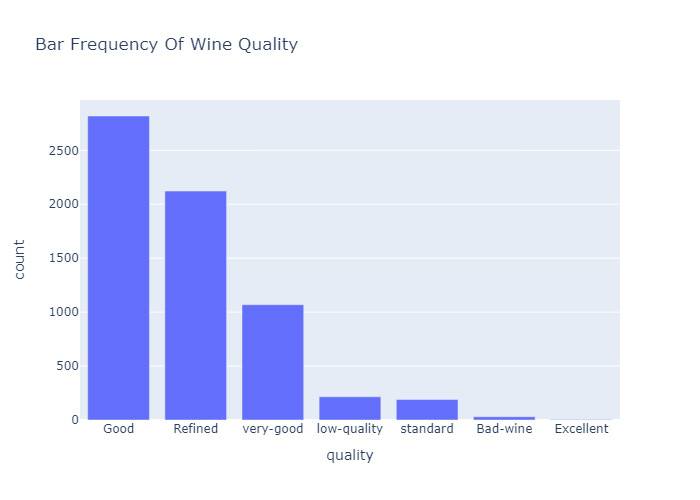

In [22]:
fig = px.bar(df2, x='quality', y='count', title='Bar Frequency Of Wine Quality')
fig.show(renderer='png')

In [23]:
df2 = df.groupby('quality')['residual sugar'].max().reset_index()
df2

,quality,residual sugar
0,Bad-wine,16.20
1,Excellent,10.60
2,Good,65.80
3,Refined,23.50
4,low-quality,17.55
5,standard,14.80
6,very-good,19.25


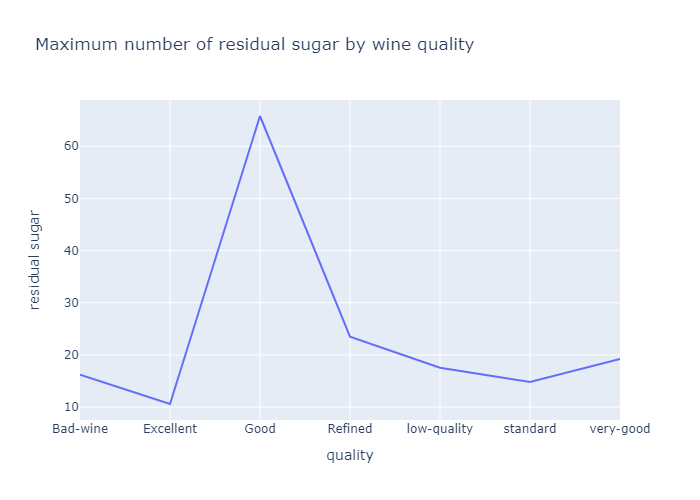

In [24]:
fig = px.line(df2, x='quality', y='residual sugar', title='Maximum number of residual sugar by wine quality')
fig.show(renderer='png')

In [22]:
df.columns

Index(['Unnamed: 0', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'Type'],
      dtype='object')

In [25]:
df2 = df.groupby('quality')['fixed acidity'].max().reset_index()
df2

,quality,fixed acidity
0,Bad-wine,11.8
1,Excellent,9.1
2,Good,14.3
3,Refined,15.9
4,low-quality,12.5
5,standard,12.6
6,very-good,15.6


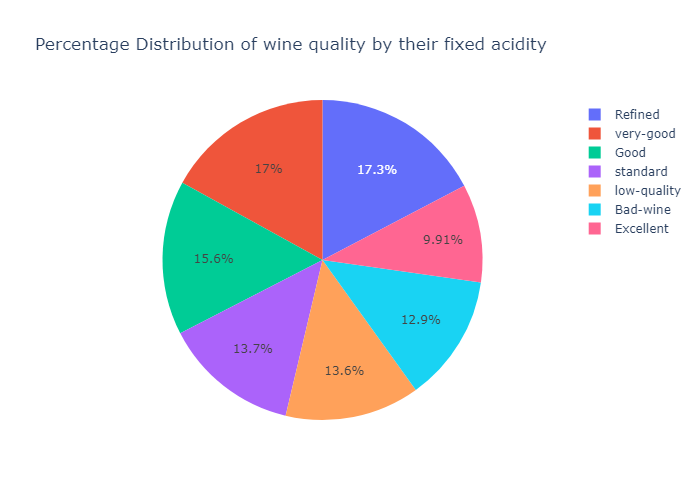

In [26]:
fig = px.pie(df2, names='quality', values='fixed acidity', title='Percentage Distribution of wine quality by their fixed acidity')
fig.show(renderer='png')

#### NB: I made use of the parameter(renderer='png'), to enable my charts display on github coz github does not surport interactive chart like plotly...to make the chart interactive you can delete the parameter "renderer"

## Drop unuseful features/Checkout for Outliers

In [10]:
drop_features = ['Unnamed: 0', 'Type', 'alcohol', 'volatile acidity', 'free sulfur dioxide', 'fixed acidity', 'density']
df = df.drop(drop_features, axis=1)
df.head(10).describe()

,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,quality
count,10.000000,10.00000,10.000000,10.00000,10.000000,10.000000,10.000000
mean,0.275000,5.34500,0.037700,115.70000,3.235000,0.456000,6.100000
std,0.083832,3.73976,0.008883,35.26109,0.241028,0.126333,0.567646
min,0.070000,1.00000,0.025000,46.00000,2.970000,0.280000,5.000000
25%,0.275000,2.10000,0.030250,98.75000,3.132500,0.365000,6.000000
50%,0.290000,5.22500,0.038500,119.00000,3.155000,0.455000,6.000000
75%,0.297500,7.07500,0.042750,130.50000,3.295000,0.490000,6.000000
max,0.380000,11.70000,0.053000,180.00000,3.760000,0.650000,7.000000


## Split the dataset into input(X) and target feature(y)

In [4]:
X = df.iloc[:, 0:6]
y = df.iloc[:, 6]


## Scale the dataset(X)

In [7]:
from sklearn.preprocessing import RobustScaler
# make an instance of the scalar
scalar = RobustScaler()
X = scalar.fit_transform(X)
X

array([[-0.15917488,  0.30769231, -0.66666667, -0.14285714, -0.25396825,
         0.        ],
       [-0.1976601 , -1.30769231,  0.11111111,  0.5       ,  1.19047619,
        -0.59259259],
       [-0.49137931, -1.76923077, -0.80555556, -0.14285714, -0.31746032,
        -0.18518519],
       ...,
       [-0.653633  , -0.53846154, -0.5       , -0.5       , -0.20634921,
         0.18518519],
       [-0.10006158, -0.61538462, -0.5       ,  0.14285714,  0.38095238,
        -0.7037037 ],
       [ 0.68134236,  0.84615385, -0.05555556,  1.07142857,  1.96825397,
         0.44444444]])

## Split the X_values into training/testing set

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

## Training the features using catboost

In [44]:
from catboost import CatBoostClassifier
# instantiate the model
model = CatBoostClassifier(iterations=300, learning_rate=0.1, depth=10)
# fit model on training data
# model.fit(X_train, y_train)

0:	learn: 1.8156123	total: 199ms	remaining: 59.4s
1:	learn: 1.7120036	total: 360ms	remaining: 53.6s
2:	learn: 1.6324880	total: 559ms	remaining: 55.4s
3:	learn: 1.5674309	total: 745ms	remaining: 55.1s
4:	learn: 1.5098454	total: 922ms	remaining: 54.4s
5:	learn: 1.4602546	total: 1.13s	remaining: 55.6s
6:	learn: 1.4150120	total: 1.32s	remaining: 55.5s
7:	learn: 1.3751739	total: 1.53s	remaining: 55.7s
8:	learn: 1.3405511	total: 1.73s	remaining: 55.9s
9:	learn: 1.3086816	total: 1.92s	remaining: 55.8s
10:	learn: 1.2803896	total: 2.12s	remaining: 55.6s
11:	learn: 1.2552484	total: 2.32s	remaining: 55.6s
12:	learn: 1.2324550	total: 2.5s	remaining: 55.2s
13:	learn: 1.2115992	total: 2.7s	remaining: 55.1s
14:	learn: 1.1935718	total: 2.89s	remaining: 54.9s
15:	learn: 1.1765424	total: 3.15s	remaining: 56s
16:	learn: 1.1600818	total: 3.37s	remaining: 56s
17:	learn: 1.1458048	total: 3.59s	remaining: 56.3s
18:	learn: 1.1328492	total: 3.79s	remaining: 56s
19:	learn: 1.1203249	total: 4s	remaining: 56s
20:

## Predict the trained model

In [45]:
predict = model.predict(X_test)
predict

array([['Good'],
       ['very-good'],
       ['Good'],
       ...,
       ['Good'],
       ['Good'],
       ['Good']], dtype=object)

## Evaluate the model performance

In [46]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predict)
accuracy = round(accuracy, 2)
accuracy



0.6

## Save/Load the model

In [47]:
import joblib as joblib
from joblib import dump, load


In [48]:
joblib.dump(model, 'winehub.joblib')

['winehub.joblib']

In [49]:
model = joblib.load('winehub.joblib')

In [50]:
model.predict([[0.27,	5.20,	0.039,	96.0,	3.16,	0.44]])


array([['Refined']], dtype=object)